In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

hr_df = pd.read_csv(r"C:\Users\danny\Desktop\Project_004\hr-data.csv")

hr_df.dtypes




id                         int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
churn                      int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [2]:
hr_df

#15 thousand workers

,id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,churn,promotion_last_5years,sales,salary
0,0,0.38,0.53,2,157,3,0,1,0,sales,low
1,1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,3,0.72,0.87,5,223,5,0,1,0,sales,low
4,4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
hr_df.nunique()

#Dummy Sales and Salary



id                       14999
satisfaction_level          92
last_evaluation             65
number_project               6
average_montly_hours       215
time_spend_company           8
Work_accident                2
churn                        2
promotion_last_5years        2
sales                       10
salary                       3
dtype: int64

In [8]:

target = ['churn']
list_measure = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
list_dummy = ['sales','salary']

target = hr_df['churn']
hr_quant_df = hr_df[list_measure]

#Multiply a few of the variables together





hr_dummy_df = hr_df[list_dummy]

Churn_false= hr_quant_df[hr_df['churn']==0]
#Churn_false.describe()

Churn_true= hr_quant_df[hr_df['churn']==1]
#Churn_true.describe()

Churn_test = (Churn_false.describe() - Churn_true.describe())/hr_quant_df.describe()

print(Churn_test)

       satisfaction_level  last_evaluation  number_project  \
count            0.523835         0.523835        0.523835   
mean             0.369940        -0.003685       -0.018101   
std             -0.188350        -0.208381       -0.680096   
min              0.333333        -0.250000        0.000000   
25%              0.931818         0.107143        0.333333   
50%              0.437500        -0.111111        0.000000   
75%              0.134146        -0.057471       -0.400000   
max              0.080000         0.000000       -0.142857   

       average_montly_hours  time_spend_company  Work_accident  \
count              0.523835            0.523835       0.523835   
mean              -0.041577           -0.141921       0.882950   
std               -0.310756            0.400408       0.476594   
min               -0.312500            0.000000            NaN   
25%                0.102564           -0.333333            NaN   
50%               -0.130000           -0.3333

In [10]:
hr_dummy_df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [11]:
hr_dummy_df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [60]:
hr_dummy_df = pd.get_dummies(hr_dummy_df)


from sklearn.preprocessing import PolynomialFeatures

x_t = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(hr_quant_df)

#print(hr_quant_df.shape)
#print(x_t.shape)

hr_quant_df_2 = pd.DataFrame(x_t)


hr_all_df = pd.concat([hr_quant_df_2, hr_dummy_df], axis=1)

X = hr_all_df

Y = hr_df['churn']

Churn_false= hr_all_df[hr_df['churn']==0]
#Churn_false.describe()

Churn_true= hr_all_df[hr_df['churn']==1]
#Churn_true.describe()

#Churn_test = (Churn_false.describe() - Churn_true.describe())/hr_quant_df.describe()

hr_churn_comp_df = pd.concat([Churn_true.mean(), Churn_false.mean()], axis=1)

print(hr_churn_comp_df)

                            0           1
0                    0.440098    0.666810
1                    0.718113    0.715473
2                    3.855503    3.786664
3                  207.419210  199.060203
4                    3.876505    3.380032
5                    0.047326    0.175009
6                    0.005321    0.026251
7                    0.325548    0.480122
8                    1.587844    2.505244
9                   89.926374  133.284198
10                   1.821213    2.196590
11                   0.021157    0.116439
12                   0.002447    0.017547
13                   3.057620    2.715655
14                 158.993069  143.090545
15                   2.935220    2.413848
16                   0.033906    0.124758
17                   0.003131    0.018729
18                 897.066928  756.920284
19                  16.015682   12.921421
20                   0.179222    0.663108
21                   0.016242    0.099667
22                 843.783534  671

In [61]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


X3_train, X3_val, y3_train, y3_val = train_test_split(X,Y,test_size = 0.3,random_state = 42)
                                                      
#Scale model 
scaler_3 = StandardScaler()
#fit scaler
scaler_3.fit(X3_train)
#transform the data
X3_train_scale = scaler_3.transform(X3_train)
X3_val_scale = scaler_3.transform(X3_val)


num_list = [ 100, 50, 30, 20, 10, 5, 3, 2, 1, 0.5, 0.1, 0.01 ]

for Cn in num_list:

    clf4 = LogisticRegression(penalty = 'l2', solver = 'newton-cg', class_weight = 'balanced', random_state = 42, C=Cn, max_iter=1000)

    clf4.fit(X3_train_scale, y3_train)
    
    y3_val_pred = clf4.predict(X3_val_scale)
    y3_train_pred = clf4.predict(X3_train_scale)
    
    print(log_loss(y3_val, y3_val_pred),accuracy_score(y3_val, y3_val_pred),precision_score(y3_val, y3_val_pred),recall_score(y3_val, y3_val_pred),f1_score(y3_val, y3_val_pred))

    
    


3.1392436058572915 0.9091111111111111 0.7641434262948207 0.894589552238806 0.8242372152986678
3.1392436058572915 0.9091111111111111 0.7641434262948207 0.894589552238806 0.8242372152986678
3.146919067188923 0.9088888888888889 0.7635350318471338 0.894589552238806 0.8238831615120275
3.146919067188923 0.9088888888888889 0.7635350318471338 0.894589552238806 0.8238831615120275
3.13156814452566 0.9093333333333333 0.7647527910685805 0.894589552238806 0.8245915735167669
3.13156814452566 0.9093333333333333 0.7647527910685805 0.894589552238806 0.8245915735167669
3.146919067188923 0.9088888888888889 0.7635350318471338 0.894589552238806 0.8238831615120275
3.1622699898521853 0.9084444444444445 0.7623211446740858 0.894589552238806 0.8231759656652362
3.1622701675405027 0.9084444444444445 0.7619047619047619 0.8955223880597015 0.823327615780446
3.19297183517871 0.9075555555555556 0.7599049128367671 0.894589552238806 0.8217652099400172
3.630473131081695 0.8948888888888888 0.7270659590598939 0.89458955223

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y3_train,y3_train_pred))

print(confusion_matrix(y3_val,y3_val_pred))

print(classification_report(y3_val,y3_val_pred))

print(classification_report(y3_train,y3_train_pred))

[[6547 1453]
 [ 276 2223]]
[[2830  598]
 [ 132  940]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      3428
           1       0.61      0.88      0.72      1072

    accuracy                           0.84      4500
   macro avg       0.78      0.85      0.80      4500
weighted avg       0.87      0.84      0.85      4500

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      8000
           1       0.60      0.89      0.72      2499

    accuracy                           0.84     10499
   macro avg       0.78      0.85      0.80     10499
weighted avg       0.88      0.84      0.84     10499



In [63]:
# Seperate by hard workers

# Number of work projects, and hour spend


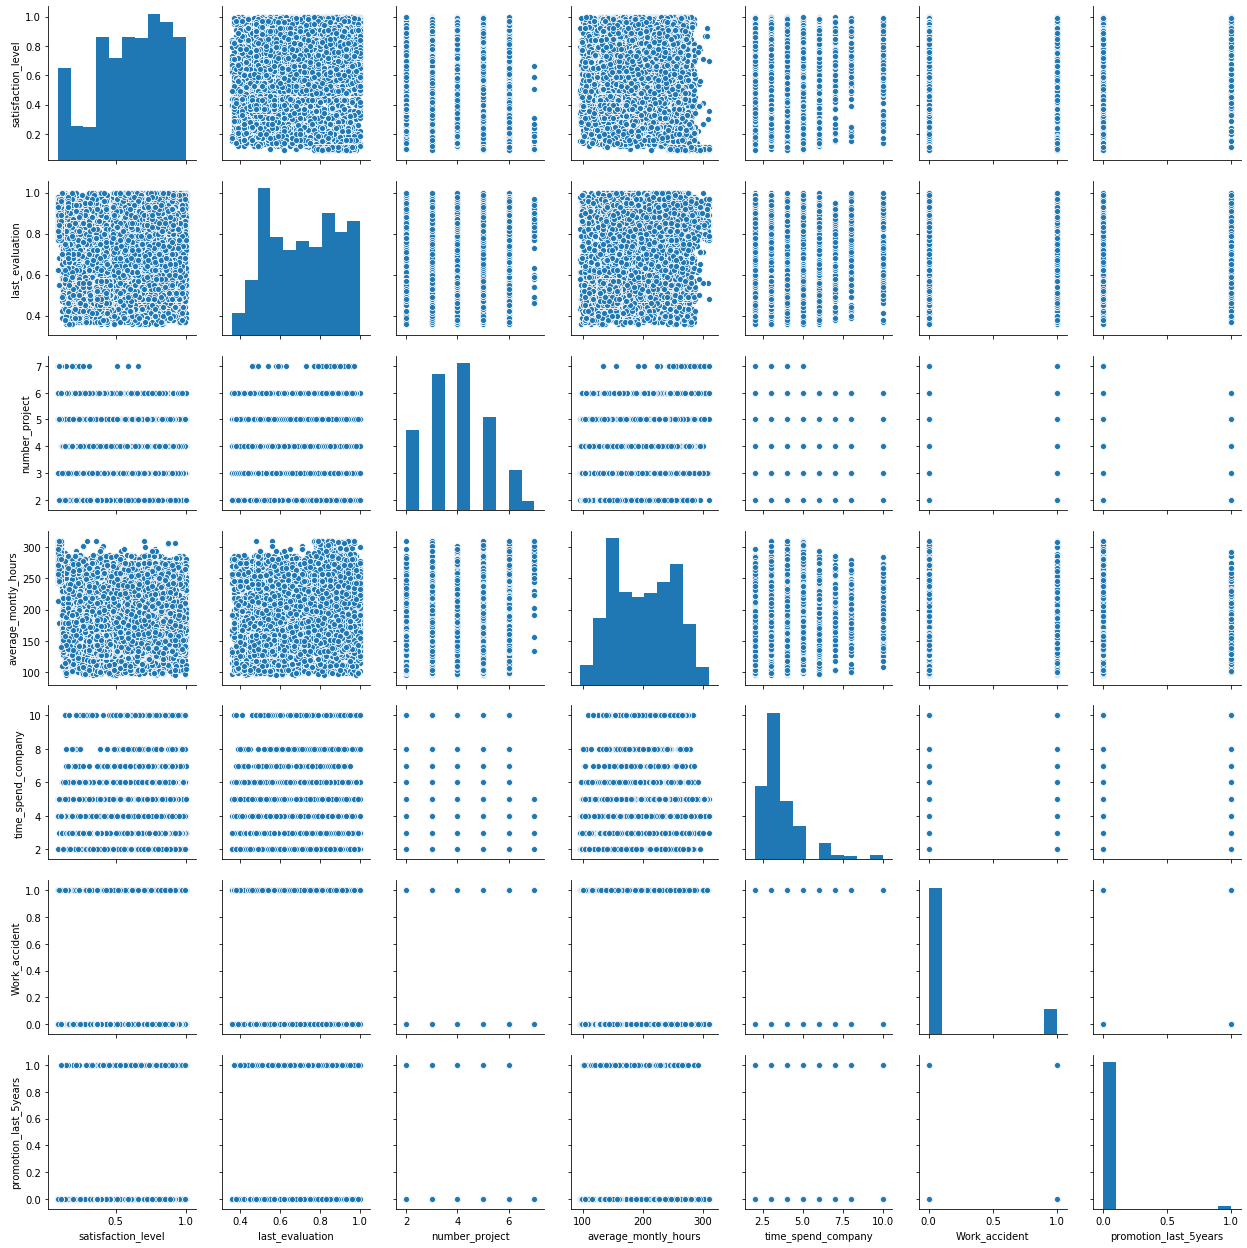

In [64]:
sns.pairplot(hr_quant_df)